## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist #mnist 데이터셋
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습 과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가


In [6]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [10]:
print('종속변수 :',data[0,0])
print('이미지(28*28을 1차원으로) \n', data[0, 1:].reshape(28,28))

종속변수 : 5.0
이미지(28*28을 1차원으로) 
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 

In [15]:
for row in data[0,1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

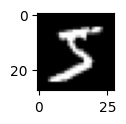

In [21]:
plt.figure(figsize=(1,1))
plt.imshow(data[0, 1:].reshape(28,28), cmap='gray')

In [22]:
! pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/46.2 MB 9.1 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/46.2 MB 10.5 MB/s eta 0:00:05
   ----- ---------------------------------- 6.3/46.2 MB 10.4 MB/s eta 0:00:04
   ------- -------------------------------- 8.7/46.2 MB 10.5 MB/s eta 0:00:04
   -------- ------------------------------- 10.2/46.2 MB 10.0 MB/s eta 0:00:04
   --------- ------------------------------ 11.5/46.2 MB 9.5 MB/s eta 0:00:04
   ----------- ---------------------------- 12.8/46.2 MB 9.0 MB/s eta 0:00:04
   ------------- -------------------------- 15.2/46.2 MB 9.3 MB/s eta 0:00:04
   -------------- ------------------------- 16.8/46.2 MB 9.0 MB/s eta 0:00:04
   --------------- ------------------------ 17.8/46.2 MB 8.6 MB/s eta 0:00:04
   ---------------- ----------------------- 18.6/46.2 MB 8.2 MB/s eta 0:00:04
   ----------------- ---------------------- 20.2/46.2 MB 8.0 MB/s eta 0:

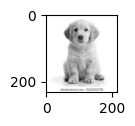

In [35]:
# 컬러사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/images.jpg', cv2.IMREAD_GRAYSCALE) # 흑백포맷으로 읽기
image_gray.shape
plt.figure(figsize=(1,1))
plt.imshow(image_gray, cmap='gray')

## 데이터 생성 및 전처리

In [400]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 50000)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((50000, 784), (50000, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 모델 생성
- 정확도 올리는 방법
    - 데이터 확보
    - 모델 수정(레이어 추가, units수 증가)
    - 과적합 방지(validation data추가, dropout, 활성화함수relu계열, tanh)
    - epoch 조정
    - optimizer 변경

In [ ]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
hist = model.fit(train_X, train_Y, epochs=20, validation_split=0.2, verbose=1, batch_size=2000)

Epoch 1/20
400/400 [==============================] - 7s 13ms/step - loss: 0.5628 - accuracy: 0.8268 - val_loss: 0.1795 - val_accuracy: 0.9543
Epoch 2/20
400/400 [==============================] - 5s 13ms/step - loss: 0.1928 - accuracy: 0.9517 - val_loss: 0.1227 - val_accuracy: 0.9689
Epoch 3/20
400/400 [==============================] - 5s 13ms/step - loss: 0.1333 - accuracy: 0.9663 - val_loss: 0.0949 - val_accuracy: 0.9741
Epoch 4/20
400/400 [==============================] - 5s 13ms/step - loss: 0.1019 - accuracy: 0.9739 - val_loss: 0.0775 - val_accuracy: 0.9797
Epoch 5/20
400/400 [==============================] - 5s 13ms/step - loss: 0.0845 - accuracy: 0.9788 - val_loss: 0.0753 - val_accuracy: 0.9804
Epoch 6/20
400/400 [==============================] - 5s 13ms/step - loss: 0.0736 - accuracy: 0.9818 - val_loss: 0.0832 - val_accuracy: 0.9797
Epoch 7/20
400/400 [==============================] - 5s 13ms/step - loss: 0.0618 - accuracy: 0.9835 - val_loss: 0.0874 - val_accuracy: 0.9794

# 모델 테스트


In [420]:
loss, accracy = model.evaluate(test_X, test_Y)
print('오차 : {:.1f}%, 정확도 : {:.1f}%'.format(loss*100,accracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1357 - accuracy: 0.9764
오차 : 13.6%, 정확도 : 97.6%


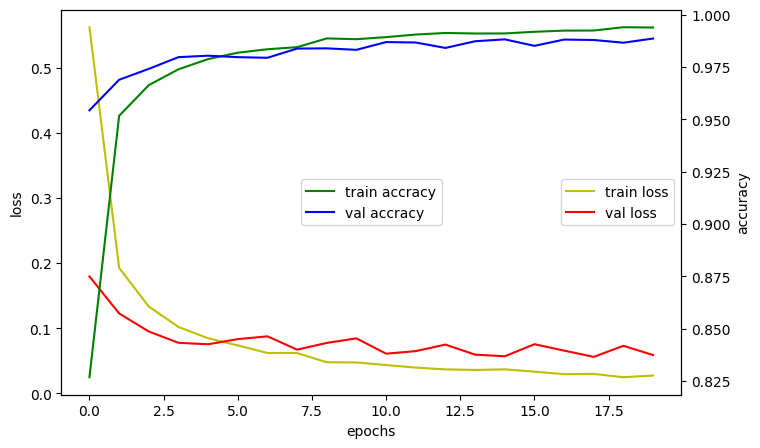

In [421]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


In [353]:
test_Y[0].argmax() == model.predict(test_X[0].reshape(-1,784)).argmax()

1/1 [==============================] - 0s 49ms/step


True

In [ ]:
# 예측값
y_hat = model.predict(test_X).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [431]:
pd.crosstab(y_test, y_hat, rownames=['실제값'],colnames=['추론값'])

추론값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,968,1,3,0,0,0,3,1,4,0
1,0,1115,1,1,0,1,2,2,12,1
2,2,2,1001,3,3,0,2,12,6,1
3,0,0,3,980,0,12,0,6,5,4
4,0,1,4,0,961,1,3,1,0,11
5,4,0,0,3,0,868,6,1,8,2
6,4,3,1,0,2,4,941,0,3,0
7,1,2,4,0,0,0,0,1017,1,3
8,0,2,1,6,7,2,1,5,946,4


In [436]:
model.save('model/08_mnist.h5')

# 콜백함수1 : 로그 출력

In [438]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [441]:
# 특정 에포크맏 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}): # 1epoch 마다 자동 실행
        self.epoch += 1 # epoch마다 self.epoch값을 1씩 증가
        if not self.epoch%10:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'), 
                                                                             logs.get('accuracy','-'), 
                                                                             logs.get('val_loss','-'), 
                                                                             logs.get('val_acc','-')))

customHistory = CustomHistory()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
hist = model.fit(train_X, train_Y, epochs=20, validation_split=0.2, verbose=0, batch_size=2000, callbacks=[customHistory])

epoch:10, loss:2.2629077434539795, acc:0.16607142984867096, val_loss:2.282515048980713, val_acc:-
epoch:20, loss:2.216966152191162, acc:0.14642857015132904, val_loss:2.24103045463562, val_acc:-


# 콜백함수2: EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [451]:
# 특정 에포크맏 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}): # 1epoch 마다 자동 실행
        self.epoch += 1 # epoch마다 self.epoch값을 1씩 증가
        if not self.epoch%10:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'), 
                                                                             logs.get('accuracy','-'), 
                                                                             logs.get('val_loss','-'), 
                                                                             logs.get('val_acc','-')))

customHistory = CustomHistory()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=20)
hist = model.fit(train_X, train_Y, epochs=500, validation_split=0.2, verbose=1, batch_size=2000, callbacks=[early_stopping])

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2.3912 - accuracy: 0.1036 - val_loss: 2.2485 - val_accuracy: 0.2214
Epoch 2/500
1/1 [==============================] - 0s 53ms/step - loss: 2.2222 - accuracy: 0.2054 - val_loss: 2.1614 - val_accuracy: 0.2571
Epoch 3/500
1/1 [==============================] - 0s 48ms/step - loss: 2.1067 - accuracy: 0.3161 - val_loss: 2.0807 - val_accuracy: 0.3571
Epoch 4/500
1/1 [==============================] - 0s 43ms/step - loss: 2.0009 - accuracy: 0.4196 - val_loss: 2.0006 - val_accuracy: 0.3929
Epoch 5/500
1/1 [==============================] - 0s 44ms/step - loss: 1.8967 - accuracy: 0.5071 - val_loss: 1.9186 - val_accuracy: 0.4429
Epoch 6/500
1/1 [==============================] - 0s 49ms/step - loss: 1.7915 - accuracy: 0.5946 - val_loss: 1.8356 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 42ms/step - loss: 1.6859 - accuracy: 0.6429 - val_loss: 1.7511 - val_accuracy: 0.5571
Epoch 8/500
1/1 [=====

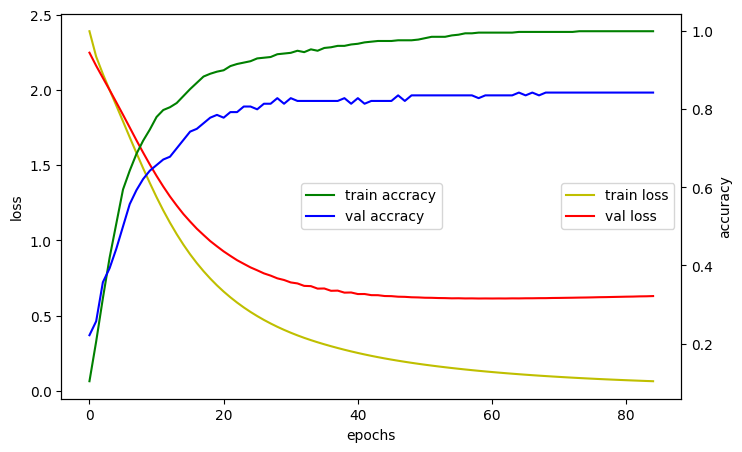

In [452]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


# 콜백함수3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [ ]:
# 특정 에포크맏 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}): # 1epoch 마다 자동 실행
        self.epoch += 1 # epoch마다 self.epoch값을 1씩 증가
        if not self.epoch%10:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.format(self.epoch, 
                                                                             logs.get('loss'), 
                                                                             logs.get('accuracy','-'), 
                                                                             logs.get('val_loss','-'), 
                                                                             logs.get('val_acc','-')))

customHistory = CustomHistory()

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=20)
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, 
                            monitor='val_accuracy', # 모리터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )           # 저장시 로그 출력
hist = model.fit(train_X, train_Y, epochs=500, validation_split=0.2, verbose=1, batch_size=2000, callbacks=[early_stopping,checkpoint])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 2.4034 - accuracy: 0.0661
Epoch 1: val_accuracy improved from -inf to 0.11429, saving model to ./model08\mnist-001-val0.1143.h5
1/1 [==============================] - 1s 782ms/step - loss: 2.4034 - accuracy: 0.0661 - val_loss: 2.2253 - val_accuracy: 0.1143
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 2.2176 - accuracy: 0.1714
Epoch 2: val_accuracy improved from 0.11429 to 0.24286, saving model to ./model08\mnist-002-val0.2429.h5
1/1 [==============================] - 0s 54ms/step - loss: 2.2176 - accuracy: 0.1714 - val_loss: 2.1247 - val_accuracy: 0.2429
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 2.0960 - accuracy: 0.2875
Epoch 3: val_accuracy improved from 0.24286 to 0.34286, saving model to ./model08\mnist-003-val0.3429.h5
1/1 [==============================] - 0s 58ms/step - loss: 2.0960 - accuracy: 0.2875 - val_loss: 2.0313 - val_accuracy: 0.3429
Epoch 4/500
1/1 [=======